### 苹果公司股票数据分析预测

In [10]:
import pandas as pd


df = pd.read_csv("http://labfile.oss.aliyuncs.com/courses/1191/AAPL.csv")  # 获取苹果公司股票数据
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9554,2018-10-31,216.880005,220.449997,216.619995,218.860001,218.860001,38358900.0
9555,2018-11-01,219.050003,222.360001,216.809998,222.220001,222.220001,58323200.0
9556,2018-11-02,209.550003,213.649994,205.429993,207.479996,207.479996,91328700.0
9557,2018-11-05,204.300003,204.389999,198.169998,201.589996,201.589996,66163700.0
9558,2018-11-06,201.919998,204.720001,201.690002,203.770004,203.770004,31811000.0


In [11]:
#数据处理

df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-31,216.880005,220.449997,216.619995,218.860001,218.860001,38358900.0
2018-11-01,219.050003,222.360001,216.809998,222.220001,222.220001,58323200.0
2018-11-02,209.550003,213.649994,205.429993,207.479996,207.479996,91328700.0
2018-11-05,204.300003,204.389999,198.169998,201.589996,201.589996,66163700.0
2018-11-06,201.919998,204.720001,201.690002,203.770004,203.770004,31811000.0


In [12]:
# 选取需要的列

df.drop(labels='Adj Close', axis=1, inplace=True)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-31,216.880005,220.449997,216.619995,218.860001,38358900.0
2018-11-01,219.050003,222.360001,216.809998,222.220001,58323200.0
2018-11-02,209.550003,213.649994,205.429993,207.479996,91328700.0
2018-11-05,204.300003,204.389999,198.169998,201.589996,66163700.0
2018-11-06,201.919998,204.720001,201.690002,203.770004,31811000.0


In [13]:
# 缺失值处理

df.isnull().values.sum() # 判断有多少缺失值

5

In [14]:
df[df.isnull().any(axis=1)] # 查看缺失值

,Open,High,Low,Close,Volume
Date,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.dropna(axis=0) # 删除缺失值
df.isnull().values.sum() # 判断缺失值是否删除

0

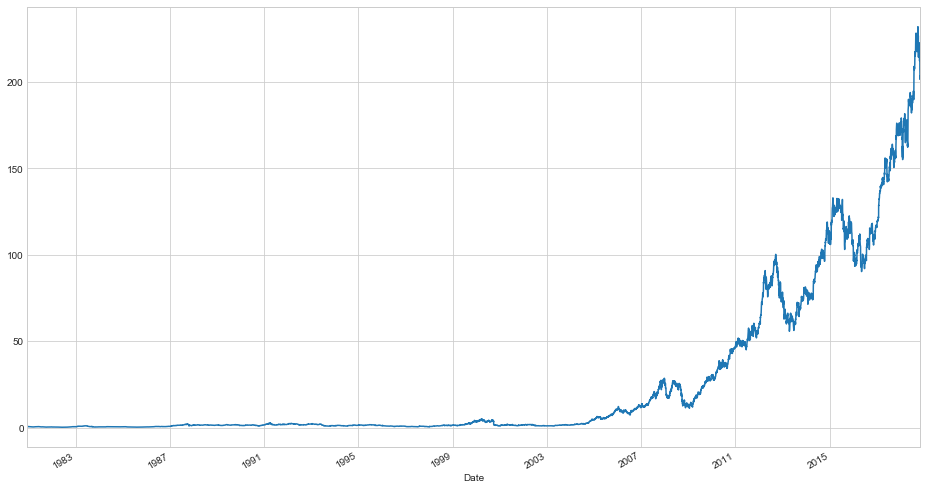

In [16]:
# 每日收盘价格曲线

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid')

df_close = df.Close
df_close.plot(figsize=(16, 9))

(<matplotlib.collections.LineCollection at 0x26a8e5f5390>,
 <matplotlib.collections.PolyCollection at 0x26a8e5f5438>)

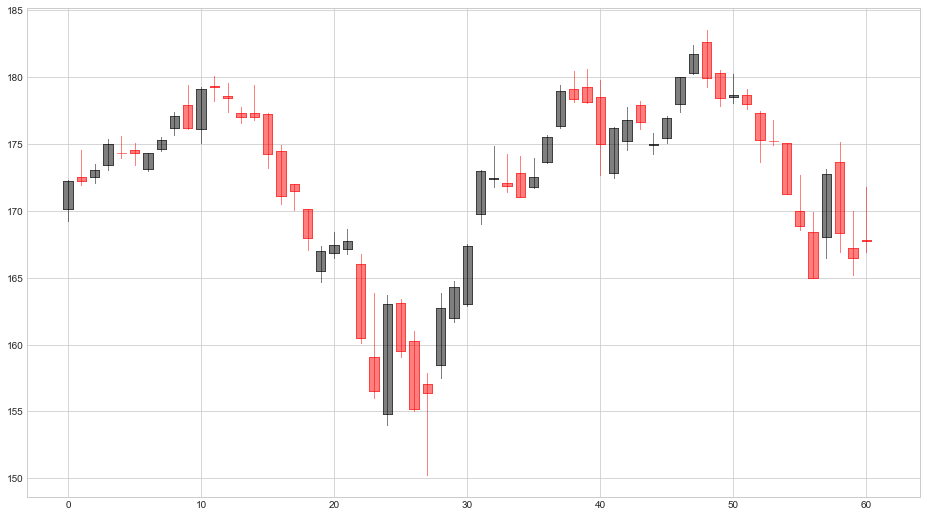

In [17]:
# 绘制K线图

from mpl_finance import candlestick2_ohlc

year_2018_1_3 = df['2018-01': '2018-03'] # 绘制2018-1到2018-3月之间的k线图

fig, ax = plt.subplots(figsize=(16, 9))
candlestick2_ohlc(ax, year_2018_1_3.Open, year_2018_1_3.High,
                 year_2018_1_3.Low, year_2018_1_3.Close, width=.7, alpha=.5)

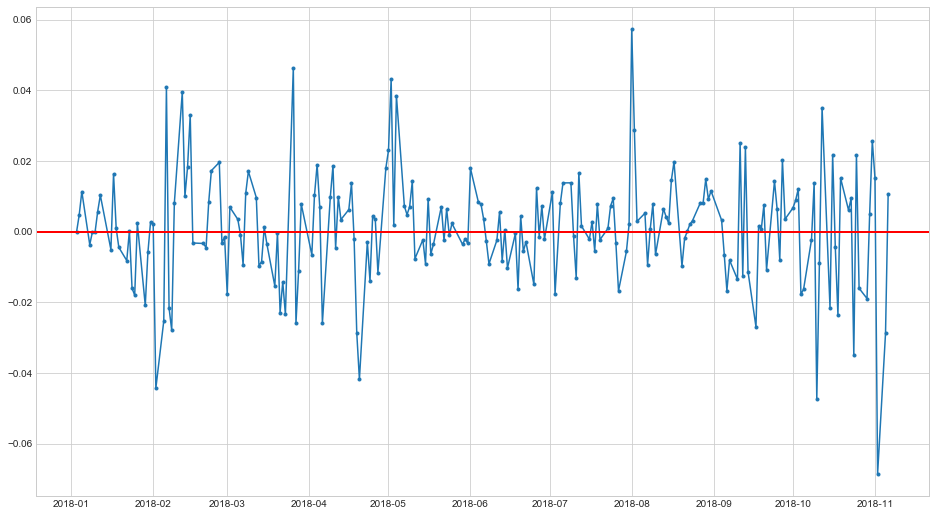

In [18]:
# 绘制每日相对涨跌趋势曲线
import numpy as np


year_2018 = df['2018']
year_2018_close = year_2018.Close
log_change = np.log(year_2018_close) - np.log(year_2018_close.shift(1))

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(log_change, '.-')
ax.axhline(y=0, color='r', lw=2)

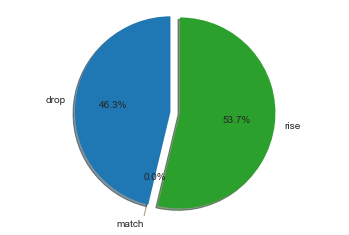

In [19]:
# 绘制相对涨跌比率饼状图

labels = 'drop', 'match', 'rise'
sizes = [(log_change < 0).sum(), (log_change == 0).sum(), (log_change > 0).sum()]

explode=(0, 0.1, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

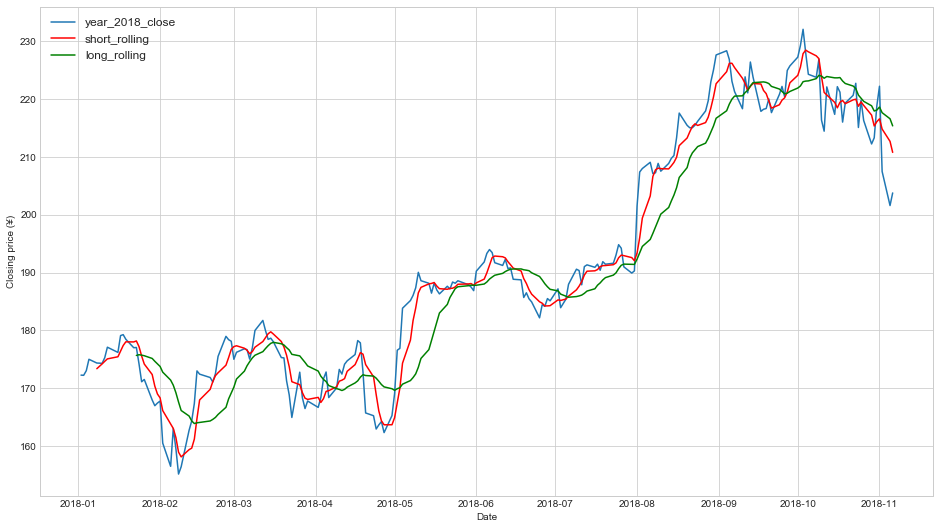

In [29]:
# 短期交易策略

short_rolling = year_2018_close.rolling(window=5).mean()
long_rolling = year_2018_close.rolling(window=15).mean()

fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(year_2018_close.index, year_2018_close, label='year_2018_close')
ax.plot(short_rolling.index, short_rolling, 'r', label='short_rolling')
ax.plot(long_rolling.index, long_rolling, 'g', label='long_rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Closing price (¥)')
ax.legend(fontsize='large')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sign
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sign
  after removing the cwd from sys.path.


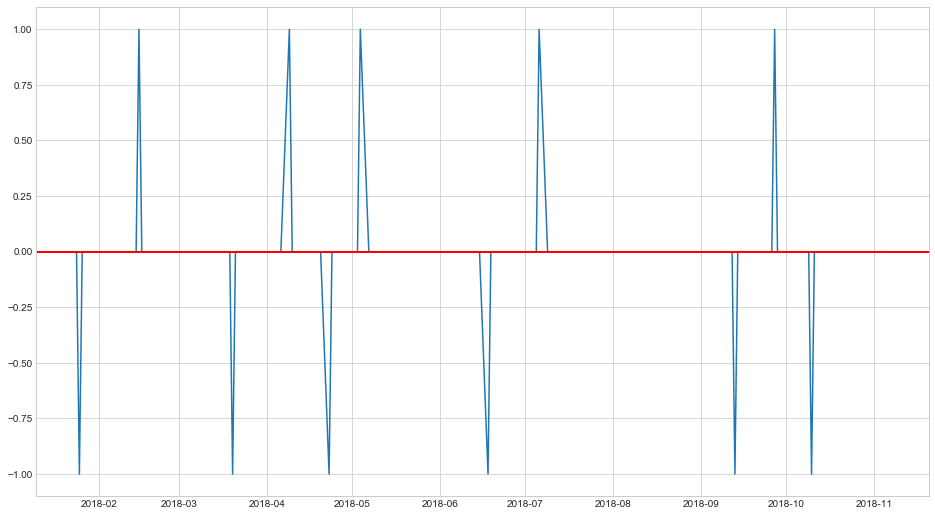

In [21]:
# 绘制适合买入卖出的时间点

short_long = np.sign(short_rolling - long_rolling)
buy_shell = np.sign(short_long - short_long.shift(1))

fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(buy_shell)
ax.axhline(y=0, color='r', lw=2)

In [22]:
# 适合买入的时间点

buy_shell[buy_shell == 1]

Date
2018-02-15    1.0
2018-04-09    1.0
2018-05-04    1.0
2018-07-06    1.0
2018-09-27    1.0
Name: Close, dtype: float64

In [23]:
# 适合卖出的时间点

buy_shell[buy_shell == -1]

Date
2018-01-25   -1.0
2018-03-20   -1.0
2018-04-23   -1.0
2018-06-18   -1.0
2018-09-13   -1.0
2018-10-10   -1.0
Name: Close, dtype: float64

In [24]:
year_2018_close['2018-10-10'] - year_2018_close['2018-02-15'] # 2018-2-15买入，2018-10-10卖出每股收益

43.369995999999986

In [27]:
# 股票长期趋势预测 

train_data = df.Close['2000':].reset_index()
train_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
train_data.tail()

,ds,y
4738,2018-10-31,218.860001
4739,2018-11-01,222.220001
4740,2018-11-02,207.479996
4741,2018-11-05,201.589996
4742,2018-11-06,203.770004


C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Text(0.5,1,'Close Price of AAPL')

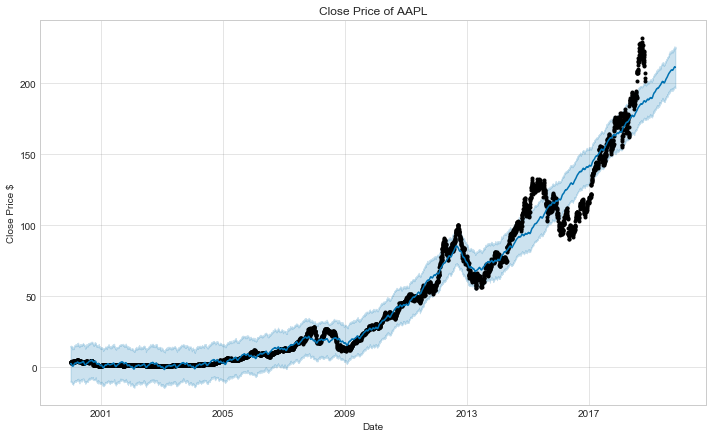

In [31]:
# 股票长期趋势预测 
from fbprophet import Prophet

model = Prophet(changepoint_prior_scale=0.05, # 设定自动突变点选择的灵活性
               daily_seasonality=True) # 定义模型
model.fit(train_data) # 训练模型
future = model.make_future_dataframe(periods=365, freq='D') # 生成需预测数据
model.plot(forecast, xlabel='Date', ylabel='Close Price $')  # 绘制预测图
plt.title('Close Price of AAPL')

In [30]:
# 绘制不同 changepoint_prior_scale 值下的趋势曲线，可以看到置信区间范围的变化。

#添加plot_color参数
def plot(m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', 
         ylabel='y', plot_color='#0072B2'):
    """Plot the Prophet forecast.
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=(10, 6))
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c=plot_color)
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color=plot_color, alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig

C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


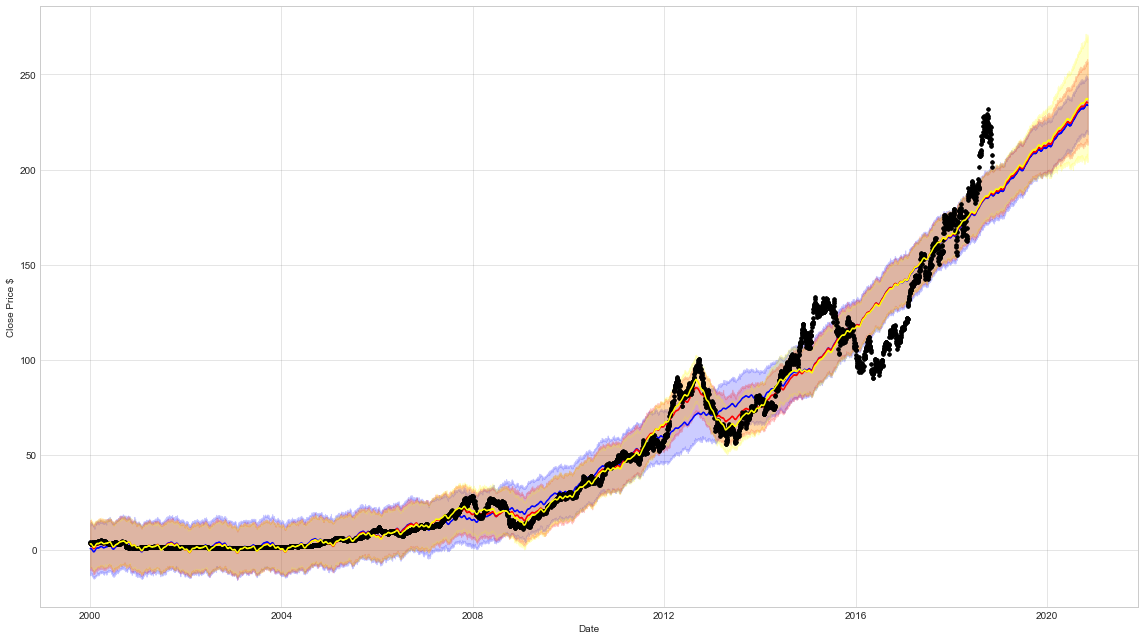

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))

for point, color in zip([0.01, 0.05, 0.1], ['blue', 'red', 'yellow']):
    temp_model = Prophet(changepoint_prior_scale=point,
                        daily_seasonality=True)
    temp_model.fit(train_data)
    temp_future = temp_model.make_future_dataframe(periods=365*2, freq='D')
    temp_forecast = temp_model.predict(temp_future)
    plot(temp_model, temp_forecast, ax=ax, xlabel='Date', 
         ylabel='Close Price $', plot_color=color)

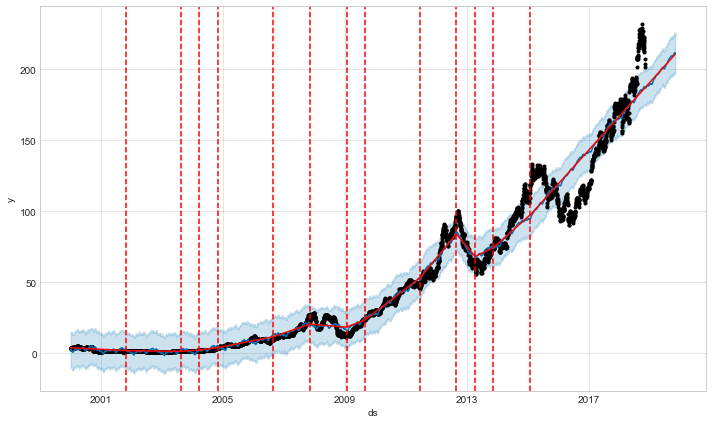

In [40]:
# 股价变化点
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
change_point = add_changepoints_to_plot(fig.gca(), model, forecast)

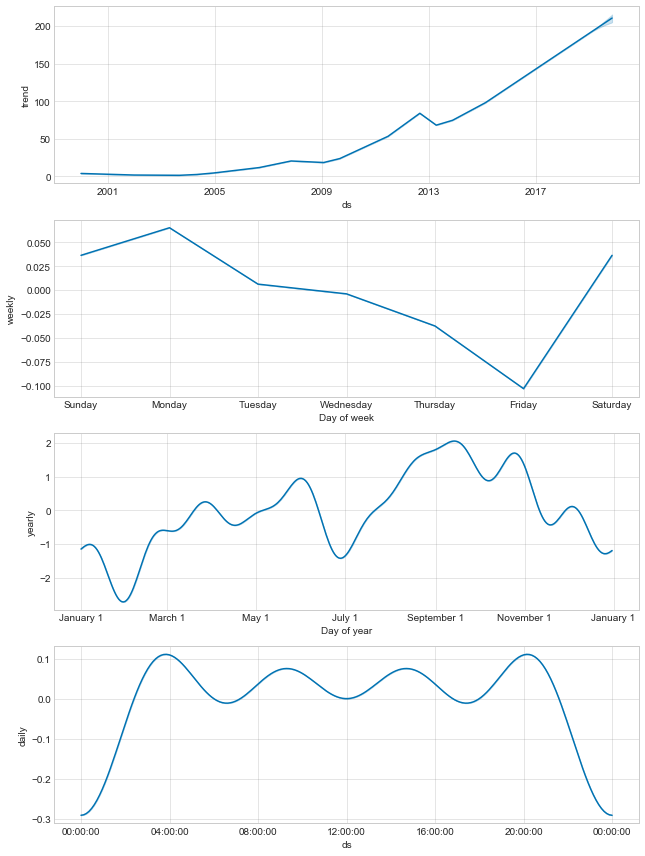

In [37]:
#不同维度下的季节变化趋势
from fbprophet.plot import plot_components

fig = model.plot_components(forecast)